In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from Scores import *
from create_dataframe import *
from create_dataframe_regression import * 
from logistic_regression import *
import time
import warnings
warnings.filterwarnings("ignore")
from Random_forest import *
from logistic_regression_optimise import * 


In [24]:
df = pd.read_csv("dataframe.csv")
df = df.drop(["Unnamed: 0"], axis = 1)
df

,time_start,time_end,sender_id,receiver_id,x_1,x_2,x_3,x_4,x_5,x_6,...,Score3Teamate_13,Score4Teamate_13,Score1Teamate_14,Score2Teamate_14,Score3Teamate_14,Score4Teamate_14,predic1,predic2,predic3,predic4
0,1396100,1397300,26,18,890.0,830.0,1610.0,100000.0,310.0,310.0,...,142305.663246,152295.663246,2183.437657,2183.437657,2183.437657,2348.437657,21,21,21,21
1,78900,81100,11,14,3070.0,100000.0,940.0,4450.0,1460.0,1680.0,...,139292.295044,110534.295044,3264.414189,3264.414189,3264.414189,2490.414189,9,9,9,9
2,36600,37300,4,10,-180.0,100000.0,-1440.0,-160.0,-1370.0,-1140.0,...,140853.014639,110805.014639,3821.544191,4721.544191,4721.544191,4148.544191,10,7,7,7
3,370300,371300,12,7,-950.0,-1140.0,1110.0,100000.0,-310.0,-2210.0,...,2124.264579,2010.264579,141488.121410,142388.121410,142443.121410,112230.121410,1,7,7,7
4,600,1400,15,24,-880.0,-930.0,-1460.0,150.0,-740.0,-110.0,...,3049.098227,2680.098227,141421.356237,142321.356237,142376.356237,112376.356237,24,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,504500,506200,7,11,-2200.0,-820.0,100000.0,-1070.0,500.0,-990.0,...,6085.597752,4876.597752,141995.144283,142895.144283,142950.144283,111933.144283,8,8,8,8
10035,1157000,1159100,17,16,-750.0,-140.0,840.0,670.0,-2530.0,100000.0,...,4544.077387,3743.077387,144091.317226,144991.317226,145046.317226,114248.317226,22,22,22,22
10036,700,1100,16,27,-1210.0,-830.0,-800.0,-410.0,-1790.0,-240.0,...,260.000000,260.000000,927.793080,927.793080,927.793080,651.793080,27,27,27,27
10037,2074300,2075100,27,21,750.0,430.0,1620.0,100000.0,100000.0,-1160.0,...,100000.000000,100000.000000,4481.539914,5381.539914,5381.539914,4724.539914,17,17,17,18


<font color='blue'>
On regarde ce que nous renvoie notre fonction directionPasse

Backward


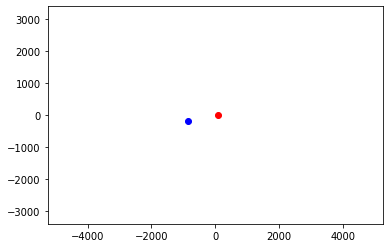

Forward


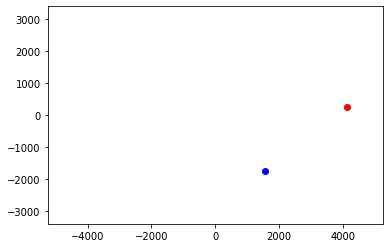

Forward


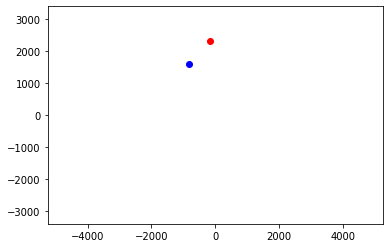

Forward


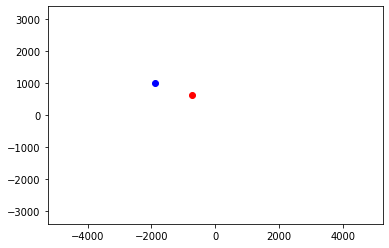

Forward


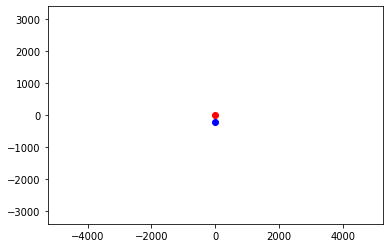

Backward


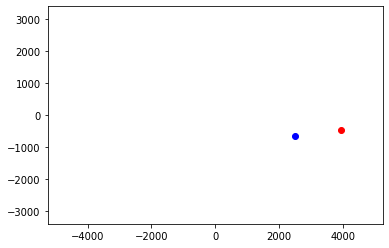

Forward


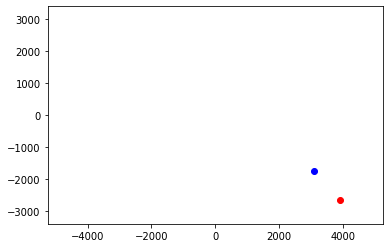

Backward


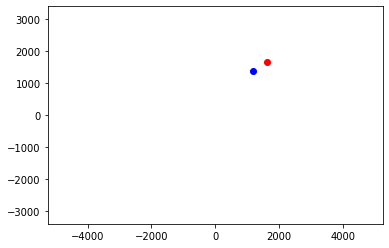

Forward


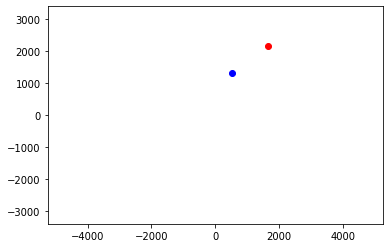

Backward


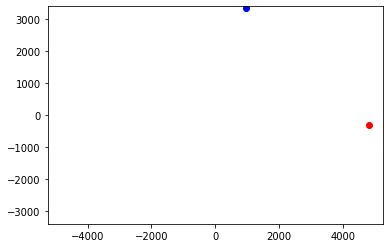

In [29]:
for i in range(10):
    ligne = df.iloc[i]
    sender = df.iloc[i,2]
    receiver = df.iloc[i,3]
    SenderX,SenderY=df.iloc[i,3+sender],df.iloc[i,31+sender]
    ReceiverX,ReceiverY=df.iloc[i,3+receiver],df.iloc[i,31+receiver]
    xmin,xmax,ymin,ymax = -5250, 5250, -3400, 3400
    print(DirectionPasse(ligne))
    plt.scatter(SenderX,SenderY, color='red')
    plt.scatter(ReceiverX,ReceiverY, color='blue')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

<font color='blue'>
Cela semble marcher

<font color='blue'>
  test taux de réussite score1

In [30]:
reussite1 = np.mean(df["predic1"]==df["receiver_id"])
reussite1

0.331507122223329

<font color='blue'>
    score2

In [31]:
reussite2 = np.mean(df["predic2"]==df["receiver_id"])
reussite2

0.39645383006275525

<Font color='blue'>
 score3

In [32]:
reussite3 = np.mean(df["predic3"]==df["receiver_id"])
reussite3

0.39685227612311985

<font color='blue'>
    score4

In [33]:
reussite4 = np.mean(df["predic4"]==df["receiver_id"])
reussite4

0.3831058870405419

<font color = blue>
Ici on crée le dataframe pour la régression logistique

In [34]:
df_regression = creation_dataframe_regression (df)
df_regression.to_csv('dataframe_regression.csv')

In [35]:
df_regression

,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone
0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,2626.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0
1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1
2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1
3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1
4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140541,7,11,14,0,10035,141995.144283,142895.144283,142950.144283,111933.144283,0.000000,0.000000,1230.040650,2351.276249,0.000000,1
140542,17,16,14,0,10036,144091.317226,144991.317226,145046.317226,114248.317226,0.000000,0.000000,382.753184,395.979797,0.000000,1
140543,16,27,14,0,10037,927.793080,927.793080,927.793080,651.793080,1260.634761,1619.413474,822.253002,900.777442,954.523178,0
140544,27,21,14,0,10038,4481.539914,5381.539914,5381.539914,4724.539914,667.083203,1721.859460,310.161248,552.268051,44.538262,1


<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE SANS OPTIMISATION

In [36]:
tous_scores, moyenne_scores , matrices_coefs = regression_logistique (10, 0.7)

In [37]:
tous_scores 

array([0.41965471, 0.3997344 , 0.41069057, 0.41633466, 0.39674635,
       0.41533865, 0.40471448, 0.40471448, 0.41301461, 0.40571049])

In [38]:
moyenne_scores

0.4086653386454183

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA regression logistique optimisee

In [2]:
x, y = regression_logistique_optimisee (10, 0.7)

In [3]:
x

array([0.42397078, 0.41998672, 0.42795485, 0.42895086, 0.44090305,
       0.41434263, 0.42197875, 0.42729084, 0.4186587 , 0.4123506 ])

In [4]:
y

0.4236387782204515

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA Random Forest

In [2]:
x, y = RandomForest (10, 0.7)

In [3]:
x

array([0.43326693, 0.43326693, 0.42861886, 0.42231076, 0.41699867,
       0.45152722, 0.43061089, 0.42463479, 0.42662683, 0.41600266])

In [4]:
y

0.4283864541832669